Kacper Kowalczyk, Regression problem

Description of the problem:
    
We want to predict amount of Solar Radiation (Watt pre meter squared), given weather data for the last week of observation.

Preprocesing and Exploratory Data Analysis:

In [1]:
def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 100*(mm + 100*hh) + 0.0
time_to_num('06:13:00')

61300.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv('SolarPrediction.csv')
df.columns=['UNIXTime' , 'Date', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection', ' Speed', 'TimeSunRise', 'TimeSunSet']

df.head(10)

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [3]:
df.tail(10)

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
32676,1480589102,12/1/2016 12:00:00 AM,00:45:02,1.20,43,30.42,101,150.62,6.75,06:41:00,17:42:00
32677,1480588802,12/1/2016 12:00:00 AM,00:40:02,1.19,43,30.42,101,178.46,5.62,06:41:00,17:42:00
32678,1480588503,12/1/2016 12:00:00 AM,00:35:03,1.19,44,30.42,101,148.63,3.37,06:41:00,17:42:00
32679,1480588205,12/1/2016 12:00:00 AM,00:30:05,1.21,44,30.42,101,101.27,10.12,06:41:00,17:42:00
32680,1480587902,12/1/2016 12:00:00 AM,00:25:02,1.18,44,30.42,102,121.02,4.50,06:41:00,17:42:00
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [4]:
a=df.drop(['UNIXTime','Date'],axis=1)


cols= [ 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection', ' Speed', 'TimeSunRise', 'TimeSunSet']


a[['Time','TimeSunRise','TimeSunSet']] = a[['Time','TimeSunRise','TimeSunSet']].applymap(time_to_num)

t=a.size/9
z=(60/5)*24*7

to_train = a.drop(np.arange(0,z-49))

week_predict = a.drop(np.arange(z-49, t))

In [5]:
week_predict.tail(5) 

,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
1962,2522.0,1.23,53,30.45,87,169.46,6.75,61200.0,181800.0
1963,2021.0,1.25,53,30.45,88,167.82,5.62,61200.0,181800.0
1964,1021.0,1.25,53,30.45,87,169.65,5.62,61200.0,181800.0
1965,526.0,1.25,53,30.45,84,165.32,10.12,61200.0,181800.0
1966,21.0,1.24,53,30.45,86,184.10,6.75,61200.0,181800.0


In [6]:
to_train.head(5)

,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
1967,235523.0,1.22,53,30.45,87,180.16,7.87,61100.0,181900.0
1968,235022.0,1.23,53,30.46,87,155.01,7.87,61100.0,181900.0
1969,234522.0,1.22,53,30.46,86,192.74,5.62,61100.0,181900.0
1970,234019.0,1.24,53,30.46,86,140.21,6.75,61100.0,181900.0
1971,233518.0,1.26,53,30.46,86,145.42,5.62,61100.0,181900.0


Corelation matrix:

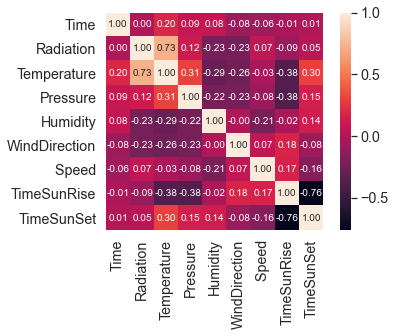

In [7]:
cm = np.corrcoef(a.values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

Scatter plot:

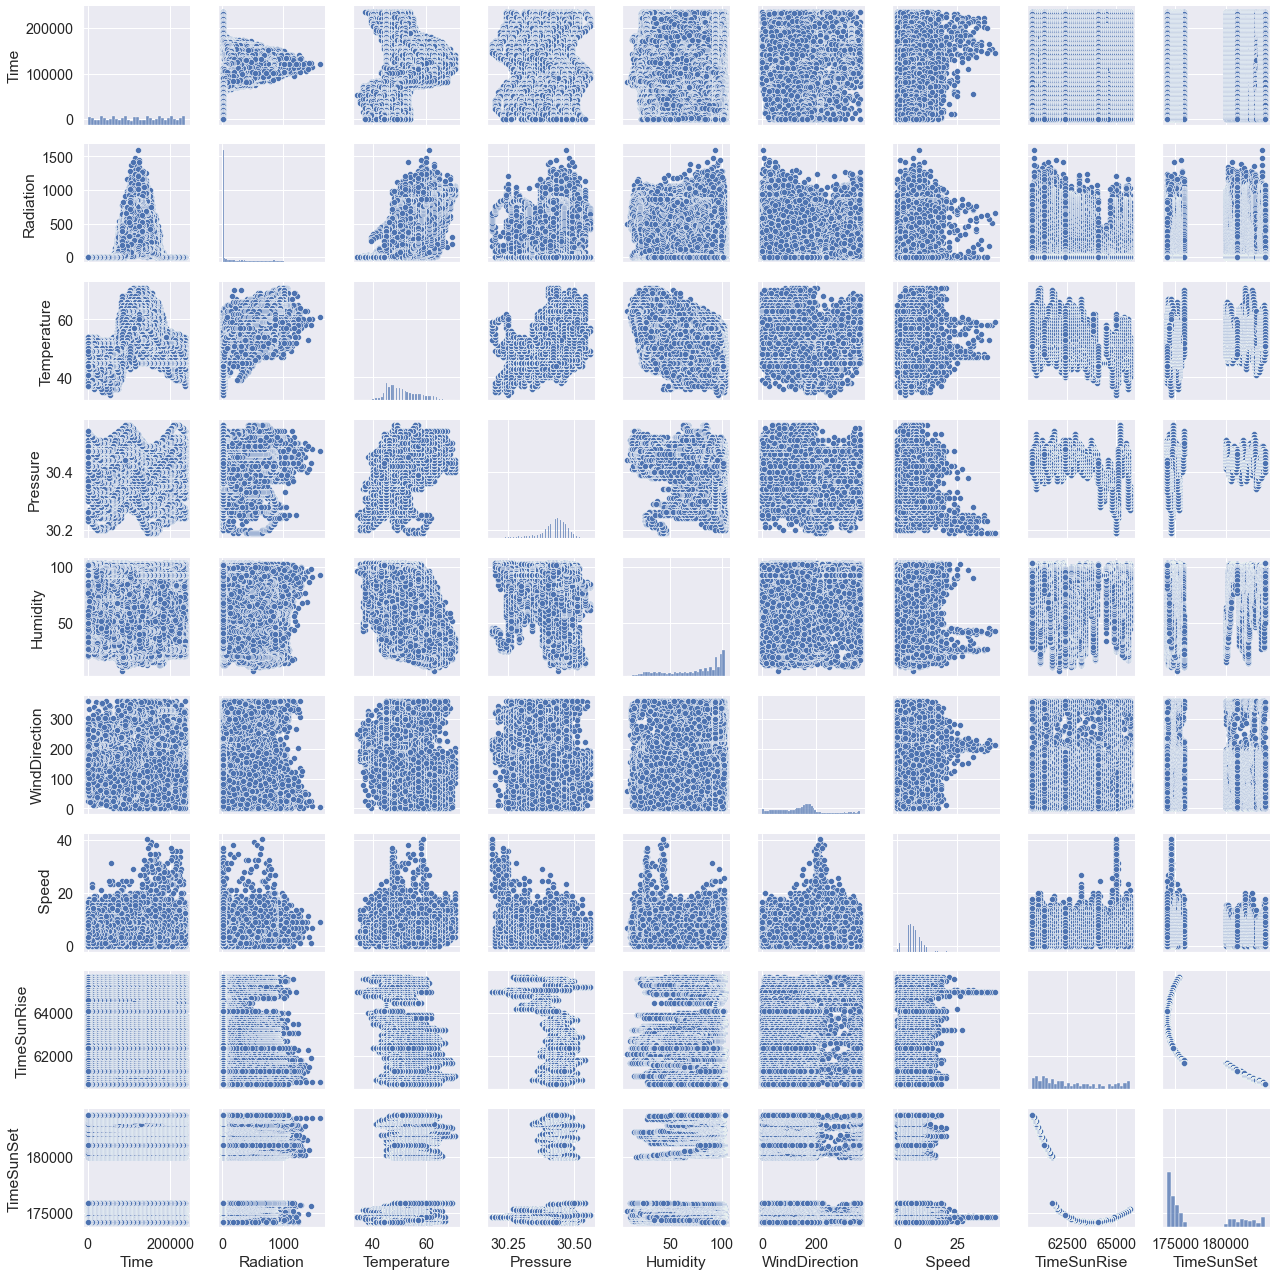

In [8]:
sns.pairplot(a[cols], height=2.0)
plt.tight_layout() 
plt.show()

Standard Linear Regression:

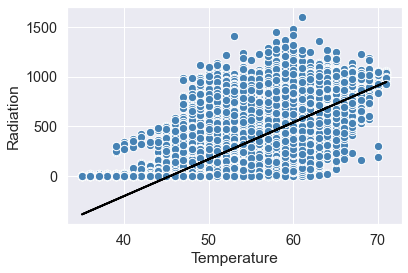

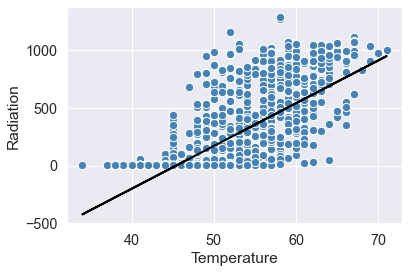

R^2 train: 0.536, test: 0.525
MSE train: 45257.395, test: 48898.270


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = to_train[['Temperature']].values

y = to_train[['Radiation']].values

X_train, X_test, y_train, y_test = train_test_split(
                 X, y, test_size=0.04, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_train ,y_train , slr)
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.show()

lin_regplot(X_test ,y_test , slr)
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.show()

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('R^2 train: %.3f, test: %.3f' %
            (r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

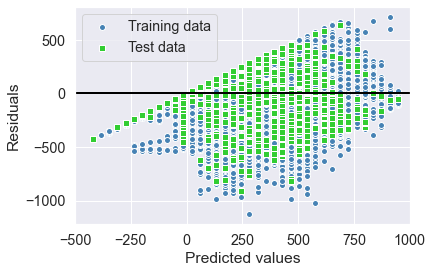

In [10]:
plt.scatter(y_train_pred, y_train_pred - y_train,
        c='steelblue', marker='o', edgecolor='white',
        label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1000, color='black', lw=2)
plt.xlim([-500, 1000])
plt.show()

RANSAC Regression:

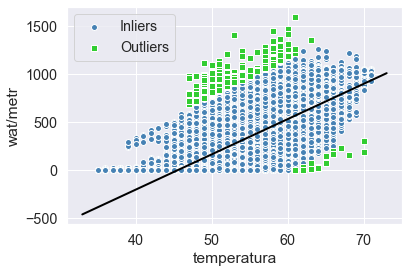

R^2 train: 0.536, test: 0.524
MSE train: 45286.137, test: 48953.498


In [11]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(),
                                        max_trials=300,
                                        min_samples=1200,
                                        loss='absolute_loss',
                                        residual_threshold=600.0,
                                        random_state=0)
ransac.fit(X_train, y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(33, 74, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X_train[inlier_mask], y_train[inlier_mask],
 c='steelblue', edgecolor='white',
 marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask],
 c='limegreen', edgecolor='white',
 marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('temperatura')
plt.ylabel('wat/metr')
plt.legend(loc='upper left')
plt.show()

y_train_pred_ransac = ransac.predict(X_train)
y_test_pred_ransac = ransac.predict(X_test)

print('R^2 train: %.3f, test: %.3f' %
            (r2_score(y_train, y_train_pred_ransac),
            r2_score(y_test, y_test_pred_ransac)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_train, y_train_pred_ransac),
            mean_squared_error(y_test, y_test_pred_ransac)))

Polynomial Regression:

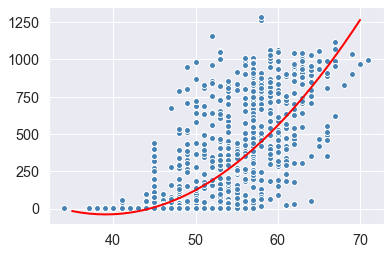

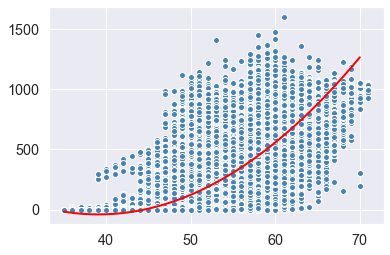

R^2 train: 0.577, test: 0.558
MSE train: 41260.379, test: 45471.375


In [12]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)

X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.fit_transform(X_test)

X_fit_train = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]

regr = LinearRegression()

regr = regr.fit(X_train_quad, y_train)
y_quad_fit_train = regr.predict(quadratic.fit_transform(X_fit_train))

plt.scatter(X_test, y_test, label='training points', color='steelblue',edgecolor='white',
 marker='o')
plt.plot(X_fit_train, y_quad_fit_train,
    label='quadratic',
    color='red',
    lw=2,
    linestyle='-')
plt.show()
plt.scatter(X_train, y_train, label='training points', color='steelblue',edgecolor='white',
 marker='o')
plt.plot(X_fit_train, y_quad_fit_train,
    label='quadratic',
    color='red',
    lw=2,
    linestyle='-')
plt.show()
print('R^2 train: %.3f, test: %.3f' %
            (r2_score(y_train, regr.predict(X_train_quad)),
             r2_score(y_test, regr.predict(X_test_quad))))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_train, regr.predict(X_train_quad)),
            mean_squared_error(y_test, regr.predict(X_test_quad))))
z1 = r2_score(y_train, regr.predict(X_train_quad))
z2 = r2_score(y_test, regr.predict(X_test_quad))

Polynomial Regression with Elastic Net to prevent overfitting:

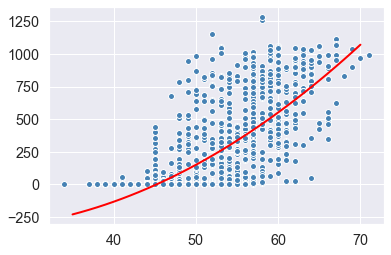

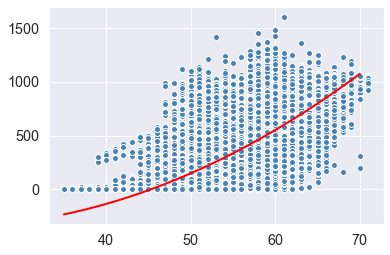

R^2 train: 0.564, test: 0.549
MSE train: 42547.750, test: 46435.506


In [13]:
from sklearn.linear_model import ElasticNet


quadratic = PolynomialFeatures(degree=2)

X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.fit_transform(X_test)

X_fit_train = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]

regr = ElasticNet(alpha=0.7, l1_ratio=0.1,max_iter=3000, random_state=0)

regr = regr.fit(X_train_quad, y_train)
y_quad_fit_train = regr.predict(quadratic.fit_transform(X_fit_train))

plt.scatter(X_test, y_test, label='training points', color='steelblue',edgecolor='white',
 marker='o')
plt.plot(X_fit_train, y_quad_fit_train,
    label='quadratic',
    color='red',
    lw=2,
    linestyle='-')
plt.show()
plt.scatter(X_train, y_train, label='training points', color='steelblue',edgecolor='white',
 marker='o')
plt.plot(X_fit_train, y_quad_fit_train,
    label='quadratic',
    color='red',
    lw=2,
    linestyle='-')
plt.show()
print('R^2 train: %.3f, test: %.3f' %
            (r2_score(y_train, regr.predict(X_train_quad)),
            r2_score(y_test, regr.predict(X_test_quad))))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_train, regr.predict(X_train_quad)),
            mean_squared_error(y_test, regr.predict(X_test_quad))))
z3 = r2_score(y_train, regr.predict(X_train_quad))
z4 = r2_score(y_test, regr.predict(X_test_quad))

In [14]:
print('Without Elastic Net: R^2 train:', 0.577, 'test:',0.558,'  The difference:', "{:.4f}".format(z1-z2))
print('With Elastic Net: R^2 train:',0.565,' test:', 0.550,'  The difference:', "{:.4f}".format(z3-z4))

Without Elastic Net: R^2 train: 0.577 test: 0.558   The difference: 0.0188
With Elastic Net: R^2 train: 0.565  test: 0.55   The difference: 0.0149


Decision Tree Regression:

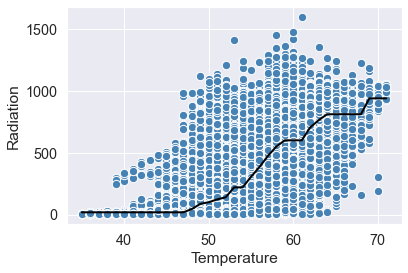

R^2 train: 0.597, test: 0.579
MSE train: 39258.005, test: 43324.445


In [15]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(max_depth=4)

tree.fit(X_train, y_train)
sort_idx = X_train.flatten().argsort()
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)
lin_regplot(X_train[sort_idx], y_train[sort_idx], tree)



plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.show()
print('R^2 train: %.3f, test: %.3f' %
        (r2_score(y_train, y_train_pred_tree),
         r2_score(y_test, y_test_pred_tree)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_train, y_train_pred_tree),
            mean_squared_error(y_test, y_test_pred_tree)))

Prepering and executing Multiple Linear Regression:

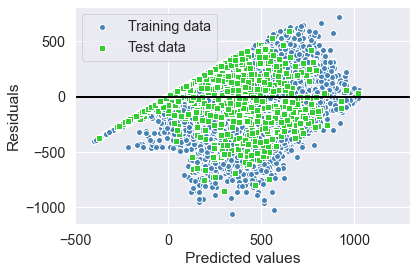

R^2 train: 0.617, test: 0.613
MSE train: 37366.366, test: 39779.010


In [16]:
good = to_train.drop(['Radiation'],axis=1)

X_multi = good.iloc[:, :].values
y_multi = to_train['Radiation'].values

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
                X_multi, y_multi, test_size=0.04, random_state=0)
slr = LinearRegression()
slr.fit(X_multi_train, y_multi_train)
y_multi_train_pred = slr.predict(X_multi_train)
y_multi_test_pred = slr.predict(X_multi_test)

plt.scatter(y_multi_train_pred, y_multi_train_pred - y_multi_train,
        c='steelblue', marker='o', edgecolor='white',
        label='Training data')
plt.scatter(y_multi_test_pred, y_multi_test_pred - y_multi_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-500, 1300])
plt.show()

print('R^2 train: %.3f, test: %.3f' %
        (r2_score(y_multi_train, y_multi_train_pred),
         r2_score(y_multi_test, y_multi_test_pred)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_multi_train, y_multi_train_pred),
            mean_squared_error(y_multi_test, y_multi_test_pred)))

Random Forest Regression:

In [17]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=100,
            criterion='mse',
            n_jobs=-1)

forest.fit(X_multi_train, y_multi_train)


y_train_pred_forest = forest.predict(X_multi_train)
y_test_pred_forest = forest.predict(X_multi_test)


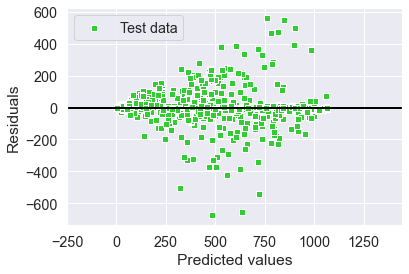

R^2 train: 0.992, test: 0.932
MSE train: 824.257, test: 6966.906


In [18]:
plt.scatter(y_test_pred_forest, y_test_pred_forest - y_multi_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_multi_train, y_train_pred_forest),
        r2_score(y_multi_test, y_test_pred_forest)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_multi_train, y_train_pred_forest),
            mean_squared_error(y_multi_test, y_test_pred_forest)))

DNN Regression using Keras: 

In [19]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_multi_train)

X_train_scaled = scaler.transform(X_multi_train)
X_test_scaled = scaler.transform(X_multi_test)

DNN = Sequential()


DNN.add(Dense(512, kernel_initializer='normal',input_dim = X_multi.shape[1], activation='relu'))

DNN.add(Dense(256, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(32, kernel_initializer='normal',activation='relu'))

DNN.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [20]:
DNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

DNN.summary()

DNN.fit(X_train_scaled, y_multi_train, epochs=100, batch_size=10, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 172,993
Trainable params: 172,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2360/2360 [===========================

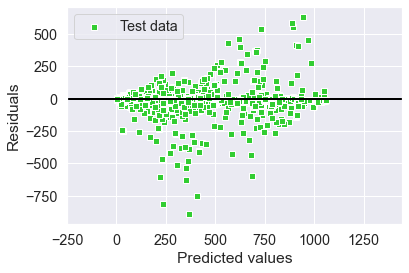

R^2 test: 0.895
MSE test: 10839.163


In [21]:
y_DNN_pred = DNN.predict(X_test_scaled)
y_DNN_R = []
for i in np.arange(0,y_DNN_pred.size):
    y_DNN_R.append(y_DNN_pred[i][0])
    
plt.scatter(y_DNN_R, y_DNN_R - y_multi_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

print('R^2 test: %.3f' % 
        (r2_score(y_multi_test, y_DNN_R)))
print('MSE test: %.3f' % 
        (mean_squared_error(y_multi_test, y_DNN_R)))

XGBoost Regression to compete with forest and DNN egression:

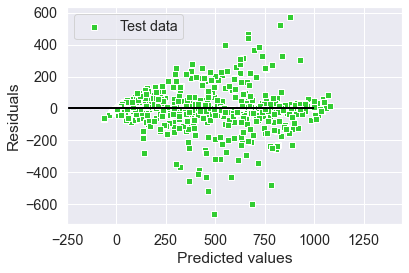

R^2 train: 0.970, test: 0.925
MSE train: 2928.871, test: 7696.916


In [22]:
from xgboost import XGBRegressor

boost = XGBRegressor()

boost.fit(X_multi_train, y_multi_train)

y_boost_train_pred = boost.predict(X_multi_train)
y_boost_test_pred = boost.predict(X_multi_test)

plt.scatter(y_boost_test_pred, y_boost_test_pred - y_multi_test,
        c='limegreen', marker='s', edgecolor='white',
        label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1000, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_multi_train, y_boost_train_pred),
        r2_score(y_multi_test, y_boost_test_pred)))
print('MSE train: %.3f, test: %.3f' %
            (mean_squared_error(y_multi_train, y_boost_train_pred),
            mean_squared_error(y_multi_test, y_boost_test_pred)))

FINAL PREDICTION:

In [30]:
week = week_predict.drop(['Radiation'],axis=1)

X_week = week.iloc[:, :].values
y_week = week_predict['Radiation'].values
scaler.fit(X_week)
X_week_scaled = scaler.transform(X_week)


y_week_pred_forest = forest.predict(X_week)

y_DNN_pred_week = DNN.predict(X_week_scaled)
y_week_pred_DNN = []
for i in np.arange(0,y_DNN_pred_week.size):
    y_week_pred_DNN.append(y_DNN_pred_week[i][0])

y_week_pred_xgboost = boost.predict(X_week)


print('R^2 forset: %.3f, DNN: %.3f, XGBoost: %.3f' % (
        r2_score(y_week, y_week_pred_forest),
        r2_score(y_week, y_week_pred_DNN),
        r2_score(y_week, y_week_pred_xgboost)))
print('MSE forset: %.3f, DNN: %.3f, XGBoost: %.3f' % (
        mean_squared_error(y_week, y_week_pred_forest),
        mean_squared_error(y_week, y_week_pred_DNN),
        mean_squared_error(y_week, y_week_pred_xgboost)))


R^2 forset: 0.820, DNN: 0.787, XGBoost: 0.742
MSE forset: 23318.582, DNN: 27726.055, XGBoost: 33549.137
MAPE forset: 0.430, DNN: 0.349, XGBoost: 5.814


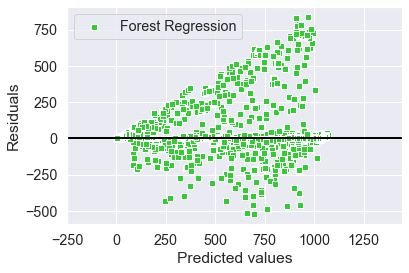

In [24]:
plt.scatter(y_week_pred_forest, y_week_pred_forest - y_week,
        c='limegreen', marker='s', edgecolor='white',
        label='Forest Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

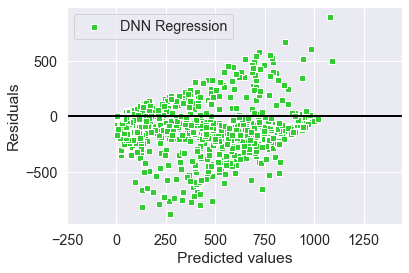

In [25]:
plt.scatter(y_week_pred_DNN, y_week_pred_DNN - y_week,
        c='limegreen', marker='s', edgecolor='white',
        label='DNN Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

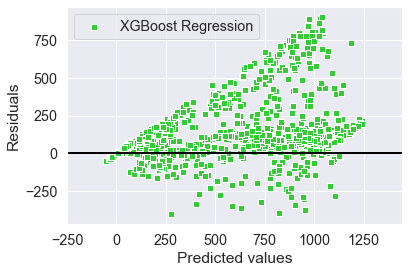

In [26]:
plt.scatter(y_week_pred_xgboost, y_week_pred_xgboost - y_week,
        c='limegreen', marker='s', edgecolor='white',
        label='XGBoost Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1000, xmax=1444, color='black', lw=2)
plt.xlim([-250, 1444])
plt.show()

Conclusion:

I would use DNN regression to predict the data. Why?

In residual plot we can see that DNN was able to pick up more dependance in data compared to RandomForest and XGBoost.